# 数据预处理
# 独热编码
可以参考[sklearn.preprocessing.LabelBinarizer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html)

In [4]:
from sklearn import preprocessing
# 创建编码器
lb = preprocessing.LabelBinarizer()

# 编码器寻找类别并匹配
lb.fit([1, 2, 6, 4, 2])

# 查看类别数组
classes = lb.classes_
print("" ,classes)

# 将目标转成独热编码
one_hot = lb.transform([1, 6])
print(one_hot)

 [1 2 4 6]
[[1 0 0 0]
 [0 0 0 1]]


# SVM

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

自定义核函数 参考[SVM with custom kernel](http://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html#sphx-glr-auto-examples-svm-plot-custom-kernel-py)


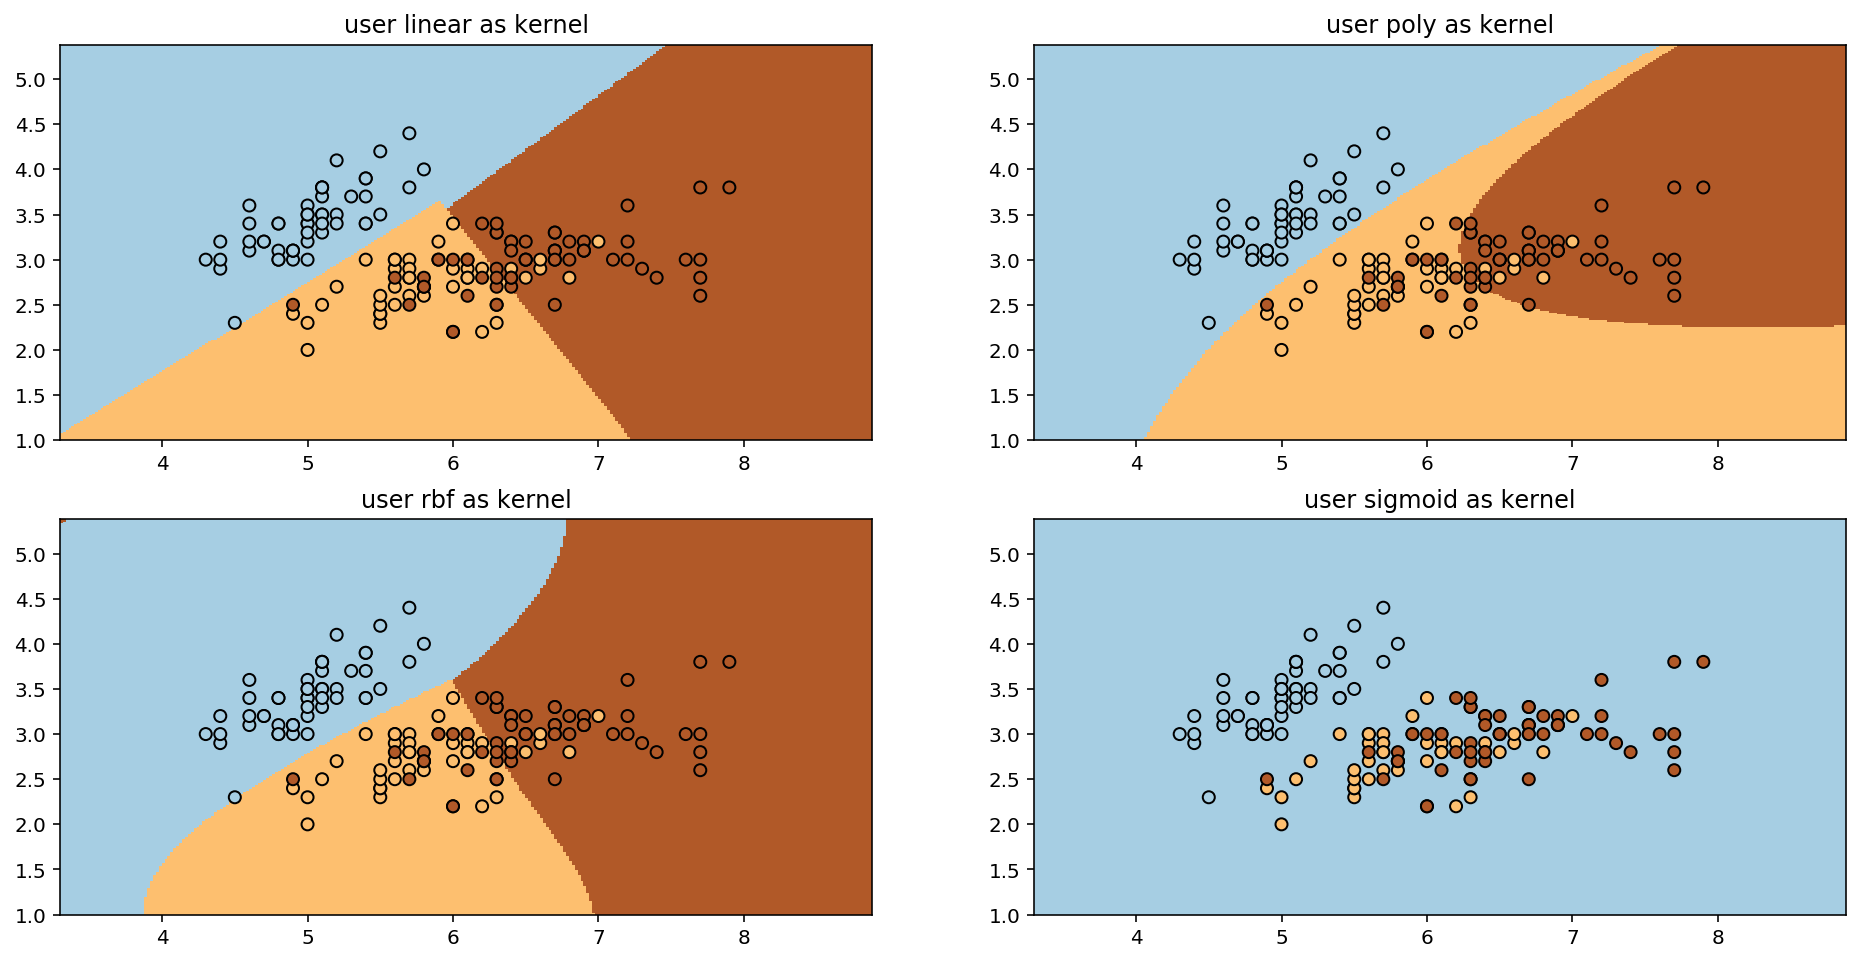

In [22]:
def svm_kernels_pic(kernels):
    # import some data to play with
    iris = datasets.load_iris()
    X = iris.data[:, :2]  # we only take the first two features. We could
                          # avoid this ugly slicing by using a two-dim dataset
    Y = iris.target

    h = .02  # step size in the mesh
    plt.figure(figsize=(16,8))
    for i,kernel in enumerate(kernels):
        # we create an instance of SVM and fit out data.
        clf = svm.SVC(kernel=kernel)
        clf.fit(X, Y)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.subplot(2,2,i + 1)
        plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
        plt.title("user " + kernel + " as kernel")
    plt.show()
kernels = ["linear","poly","rbf","sigmoid"]
svm_kernels_pic(kernels)

In [30]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])
from sklearn.svm import SVC
clf = SVC()
clf.fit(X, y)
X_test = np.array([[-0.8, -1], [-1, -0.8], [2, 0.8]])
y_test = np.array([1, 1, 2])

In [31]:
clf.score(X_test,y_test)

1.0

In [27]:
clf.predict(X_test)

array([1, 1, 2])

In [24]:
# 获取模型参数
clf.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [35]:
# 距离衡量
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('euclidean')
X = [[0, 1, 2],
     [3, 4, 5]]
print(dist.pairwise(X))
np.linalg.norm(np.array(X[0])-np.array(X[1]))

[[ 0.          5.19615242]
 [ 5.19615242  0.        ]]


5.196152422706632